In [12]:
## import lib
import pandas as pd
import numpy as np
from numpy.linalg import pinv,inv,matrix_power
from scipy.linalg import sqrtm
from scipy.io import loadmat
import itertools
import math
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
def Turn2OneHot(feature):
    Orientation_onehot = np.zeros(4)
    GAD_onehot = np.zeros(6)
    Orientation = int(feature[5])-2 # range: 2,3,4,5 -> eg. 3 == [0100]; 4 == [0010]
    GAD = int(feature[7]) # range: 0,1,2,3,4,5 -> eg. 2 == [001000]; 4 == [000010]
    Orientation_onehot[Orientation] = 1
    GAD_onehot[GAD] = 1
    Orientation_onehot = Orientation_onehot.tolist()
    GAD_onehot = GAD_onehot.tolist()
    feature = feature[:5] + Orientation_onehot + [feature[6]] + GAD_onehot
    return feature
    

# load data
categorical2onehot_index = [5, 7]
data_dir = './Dataset/energy_efficiency_data.csv'
df_data = pd.read_csv(data_dir,header=None)
Data_N, attr_N = df_data.shape

# create feature
All_onehot_feat = []
print('Total-data-Num : ',Data_N)
for i in range(Data_N):
    if i > 0:
        feat = list(map(float, df_data.iloc[[i]].as_matrix()[0]))
        onehot_feat = Turn2OneHot(feat)
        All_onehot_feat.append(onehot_feat)
tr_feat = np.array(All_onehot_feat[:576])
ts_feat = np.array(All_onehot_feat[576:])
tr_label = list(map(float, df_data[8][1:577].as_matrix()))
ts_label = list(map(float, df_data[8][577:].as_matrix()))

feat_dim = tr_feat.shape[1]
print('len of tr_feat = ',len(tr_feat))
print('len of ts_feat = ',len(ts_feat))
print('len of tr_label = ',len(tr_label))
print('len of ts_label = ',len(ts_label))
print('type of tr_feat = ',type(tr_feat))
print('type of ts_feat = ',type(ts_feat))
print('type of tr_label = ',type(tr_label))
print('type of ts_label = ',type(ts_label))

Total-data-Num :  769
len of tr_feat =  576
len of ts_feat =  192
len of tr_label =  576
len of ts_label =  192
type of tr_feat =  <class 'numpy.ndarray'>
type of ts_feat =  <class 'numpy.ndarray'>
type of tr_label =  <class 'list'>
type of ts_label =  <class 'list'>


In [3]:
tr_feat_rmfeat1 = np.delete(tr_feat, [0], axis=1)
tr_feat_rmfeat2 = np.delete(tr_feat, [1], axis=1)
tr_feat_rmfeat3 = np.delete(tr_feat, [2], axis=1)
tr_feat_rmfeat4 = np.delete(tr_feat, [3], axis=1)
tr_feat_rmfeat5 = np.delete(tr_feat, [4], axis=1)
tr_feat_rmfeat6 = np.delete(tr_feat, np.s_[5:9], axis=1)
tr_feat_rmfeat7 = np.delete(tr_feat, [9], axis=1)
tr_feat_rmfeat8 = np.delete(tr_feat, np.s_[10:16], axis=1)
tr_feat_rmfeat_lst = [tr_feat_rmfeat1,tr_feat_rmfeat2,tr_feat_rmfeat3,tr_feat_rmfeat4,tr_feat_rmfeat5,tr_feat_rmfeat6,tr_feat_rmfeat7,tr_feat_rmfeat8]

ts_feat_rmfeat1 = np.delete(ts_feat, [0], axis=1)
ts_feat_rmfeat2 = np.delete(ts_feat, [1], axis=1)
ts_feat_rmfeat3 = np.delete(ts_feat, [2], axis=1)
ts_feat_rmfeat4 = np.delete(ts_feat, [3], axis=1)
ts_feat_rmfeat5 = np.delete(ts_feat, [4], axis=1)
ts_feat_rmfeat6 = np.delete(ts_feat, np.s_[5:9], axis=1)
ts_feat_rmfeat7 = np.delete(ts_feat, [9], axis=1)
ts_feat_rmfeat8 = np.delete(ts_feat, np.s_[10:16], axis=1)
ts_feat_rmfeat_lst = [ts_feat_rmfeat1,ts_feat_rmfeat2,ts_feat_rmfeat3,ts_feat_rmfeat4,ts_feat_rmfeat5,ts_feat_rmfeat6,ts_feat_rmfeat7,ts_feat_rmfeat8]
print(tr_feat.shape)

(576, 16)


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  25.74731812845405
RMS-err-testing =  25.5788785525764


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  77.7311911478571
RMS-err-testing =  77.62973527617162


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  59.79264469635033
RMS-err-testing =  59.49049681947359


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  56.53039229282938
RMS-err-testing =  56.641999969790284


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  50.21807585912129
RMS-err-testing =  50.23376153088867


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  220.51064642535775
RMS-err-testing =  220.32090360210606


  0%|          | 0/300 [00:00<?, ?it/s]

RMS-err-training =  26.91816001392969
RMS-err-testing =  26.837518827207013


100%|██████████| 300/300 [00:00<00:00, 1157.30it/s]


RMS-err-training =  19.926531668546563
RMS-err-testing =  20.099732464896707


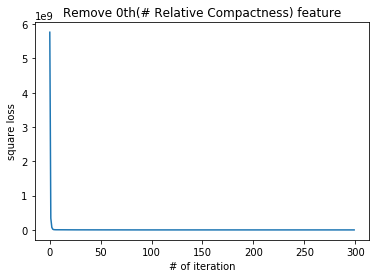

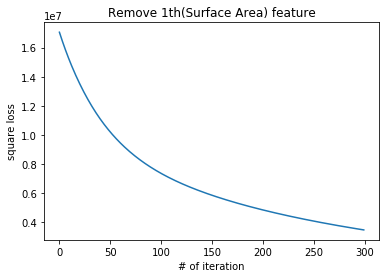

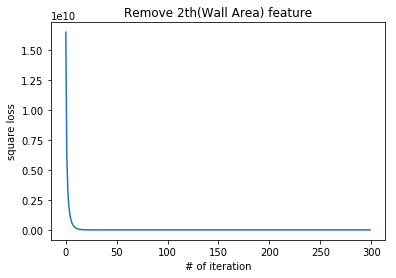

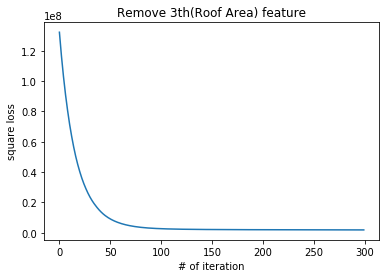

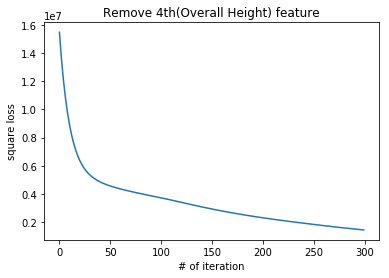

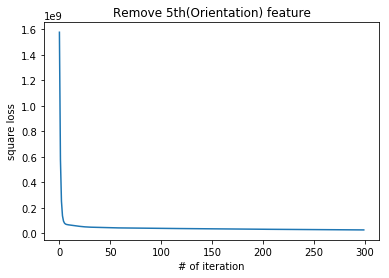

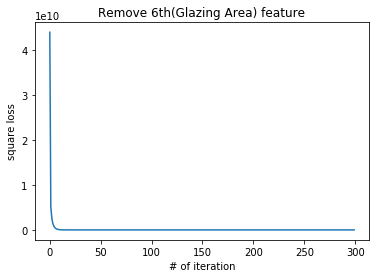

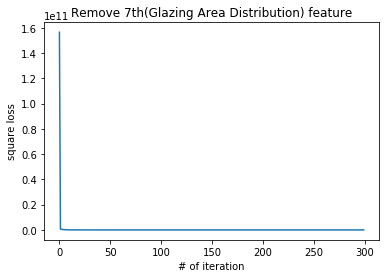

In [8]:
y_pred_lst = []
y_pred_test_lst = []
for feat_idx in range(len(tr_feat_rmfeat_lst)):
    tr_feat = tr_feat_rmfeat_lst[feat_idx]
    feat_dim = tr_feat.shape[1]
    plt.figure(feat_idx)
    
    # Initial-Para.
    W1 = np.random.randn(feat_dim, 10)
    W2 = np.random.randn(10, 10)
    W3 = np.random.randn(10, 1)
    b1 = np.random.randn(10)
    b2 = np.random.randn(10)
    b3 = np.random.randn(1)
    lr = 1e-11

    def act_func(a_ary):
        # RELU
        a_ary[a_ary<0]=0
        return a_ary

    def act_derivative(a_ary):
        # Derivative of RELU
        a_ary[a_ary<=0]=0
        a_ary[a_ary>0]=1
        return a_ary

    # fwd, bwd
    def fwd(input_X):
        b1_mat = np.tile(b1,(576,1)).T
        b2_mat = np.tile(b2,(576,1)).T
        b3_mat = np.tile(b3,(576,1)).T    
        a1 = np.matmul(W1.T,input_X.T) + b1_mat
        h1 = act_func(a1)
        a2 = np.matmul(W2.T,h1) + b2_mat
        h2 = act_func(a2)
        a3 = np.matmul(W3.T,h2) + b3_mat
        y_pre = a3
        return a1, a2, a3, h1, h2, y_pre

    def bwd(x,h1,h2,y_pred,a1,a2,a3,yt_label):
        global b1,b2,b3,W1,W2,W3

        g = -2*(yt_label-y_pred)

        # third-layer
        grad_b3 = np.sum(g,axis = 1)
        grad_w3 = np.matmul(g,h2.T).T
        g = np.matmul(W3,g)

        # second-layer
    #     g = np.multiply(g, act_derivative(a2))
        g = (a2>0)*g
    #     
        grad_b2 = np.sum(g,axis = 1)
        grad_w2 = np.matmul(g,h1.T).T
        g = np.matmul(W2,g)

        # first-layer
    #     g = np.multiply(g, act_derivative(a1))
        g = (a1>0)*g

        grad_b1 = np.sum(g,axis = 1)
        grad_w1 = np.matmul(g,x).T

        grad_b = [grad_b1,grad_b2,grad_b3]
        grad_w = [grad_w1,grad_w2,grad_w3]
        return grad_b, grad_w

    # main-function
    err_lst = []
    for i in tqdm(range(300)):
        a1, a2, a3, h1, h2, y_pred = fwd(tr_feat)
        grad_b, grad_w = bwd(tr_feat, h1, h2, y_pred, a1, a2, a3, tr_label)
    #     rms_err = np.sqrt( np.sum((y_pred - tr_label)**2) / 576 )
    #     print(y_pred[0][5],tr_label[5])
        err = np.sum((y_pred - tr_label)**2)

        b1 -= lr*grad_b[0]
        b2 -= lr*grad_b[1]
        b3 -= lr*grad_b[2]
        W1 -= lr*grad_w[0]
        W2 -= lr*grad_w[1]
        W3 -= lr*grad_w[2]
        err_lst.append(err)
        
    y_pred_lst.append(y_pred)
    RMS_err = np.sqrt(np.mean((y_pred - tr_label)**2))
    
    ## Run On Testing-data
    ts_feat = ts_feat_rmfeat_lst[feat_idx] # apply the best removing feature choice on test data

    b1_mat_test = np.tile(b1,(192,1)).T
    b2_mat_test = np.tile(b2,(192,1)).T
    b3_mat_test = np.tile(b3,(192,1)).T   
    a1_test = np.matmul(W1.T,ts_feat.T) + b1_mat_test
    h1_test = act_func(a1_test)
    a2_test = np.matmul(W2.T,h1_test) + b2_mat_test
    h2_test = act_func(a2_test)
    a3_test = np.matmul(W3.T,h2_test) + b3_mat_test
    y_pred_test_lst.append(a3_test)
    RMS_err_test = np.sqrt(np.mean((a3_test - ts_label)**2))
    
    plt.plot(range(300), err_lst) 
    plt.xlabel('# of iteration')
    plt.ylabel('square loss')
    plt.title('Remove %sth(%s) feature'%(str(feat_idx),list(map(str, df_data.iloc[[0]].as_matrix()[0]))[feat_idx]))
    print('RMS-err-training = ',RMS_err)
    print('RMS-err-testing = ',RMS_err_test)
    plt.savefig('Remove_%sth_feature_learningCurve'%str(feat_idx))
plt.show()

## Draw the Regression Result with training/testing label

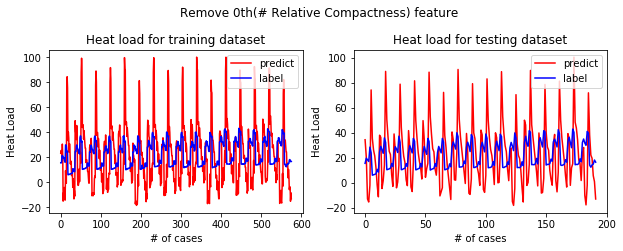

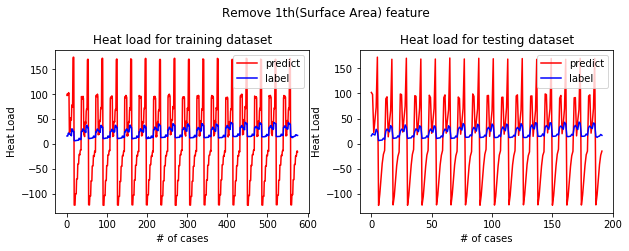

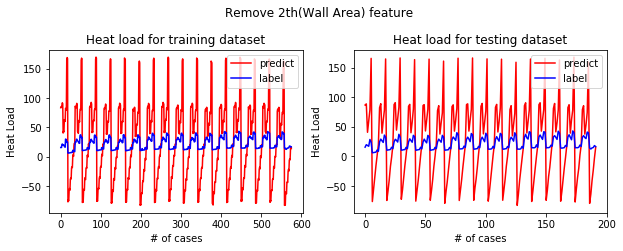

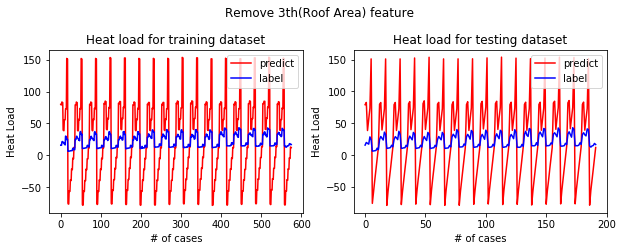

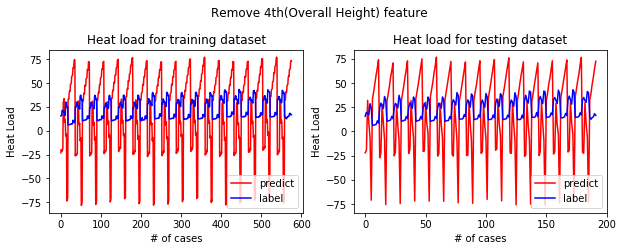

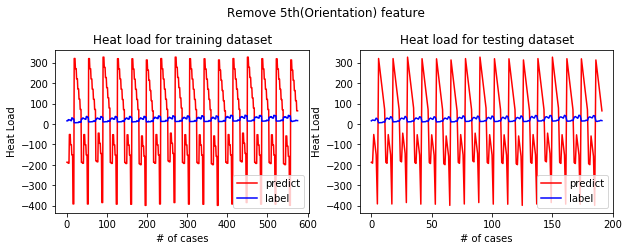

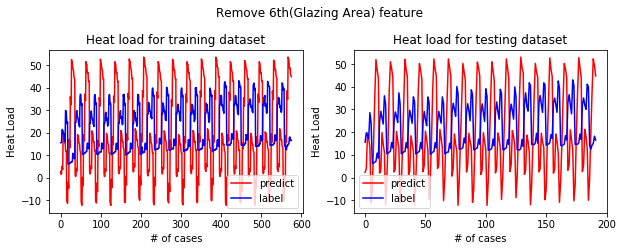

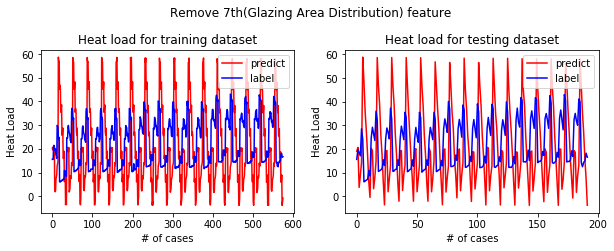

In [11]:

for i in range(8):
    plt.figure(i,figsize=(10,3))
    plt.subplot(121)
    predicting_plot_tr, = plt.plot(range(576),y_pred_lst[i].T,'r',label="predict")
    groundtruth_plot_tr, = plt.plot(range(576),np.array(tr_label),'b',label="label")
    plt.legend(handles=[predicting_plot_tr,groundtruth_plot_tr])
    plt.title('Heat load for training dataset')
    plt.xlabel('# of cases')
    plt.ylabel('Heat Load')
    
    plt.subplot(122)
    predicting_plot_ts, = plt.plot(range(192),y_pred_test_lst[i].T,'r',label="predict")
    groundtruth_plot_ts, = plt.plot(range(192),np.array(ts_label),'b',label="label")
    plt.legend(handles=[predicting_plot_ts,groundtruth_plot_ts])
    plt.title('Heat load for testing dataset')
    plt.xlabel('# of cases')
    plt.ylabel('Heat Load')
    
    plt.suptitle('Remove %sth(%s) feature'%(str(i),list(map(str, df_data.iloc[[0]].as_matrix()[0]))[i]),y=1.08)
# plt.savefig('Remove_%sth_feature_Regression_trainLabel'%str(i))
plt.show()
# savefig('')